<h1 align="center" style="font-size:30px"> Détermination de l'incertidude d'un titrage colorimétrique par la méthode de Monte-Carlo </h1> 

<h1 align="center" style="font-size:20px"> Méthode de Monte-Carlo </h1> 

<div class="alert alert-block alert-danger">
    <p> Après avoir déterminé la concentration de diiode dans la bétadine, on souhaite évaluer l'incertitude associée à la valeur.</p>
    <p> La <b> méthode de Monte-Carlo </b> consisite à simuler un grand nombre de titrages en tenant compte des incertitudes associées au volume et à la concentration de solution titrée et au volume équivalent.</p>
</div>

<img src="titrage_A_B.jpg" style="width:40%; margin-left: auto;margin-right: auto;">

$$aA + bB \longrightarrow cC + dD$$

<div class="alert alert-block alert-info">
    <b> Consignes </b>
    <p> Exécuter la cellule suivante et passer à la suite</p>
</div>

In [3]:
#Importation  des bibliothèque
import matplotlib.pyplot as plt
import numpy as np
#
### Définition des fonctions ###
def Tiragealéatoire(L):
    tirage=np.random.normal()
    return L[0]+L[1]*tirage
    '''Renvoie  une valeur aléatoire comprise entre X-u(X) et X+u(X)
    en suivant une loie normale

    Argument :
    tableau -- [X, u(X)]
    '''

In [4]:
#Importation  des bibliothèque
import matplotlib.pyplot as plt
from numpy import random
#
### Définition des fonctions ###
def Tiragealéatoire(L):
    tirage=random.normal()
    return L[0]+L[1]*tirage
    '''Renvoie  une valeur aléatoire comprise entre X-u(X) et X+u(X)
    en suivant une loie normale

    Argument :
    liste -- liste [X, u(X]
    '''

<div class="alert alert-block alert-info">
    <b> Consignes </b>
    <p> Compléter et exécuter la cellule suivante (question 2)</p>
</div>

In [5]:
### Données et valeurs expérimentales ###
C_B=[0.1,0.01]       # A Compléter [mesure, incertitude]
V_A=[0.01,0.0001]
V_E=[0.008,0.0005]

In [7]:
# coefficients stoechiométriques
a = 1
b = 2
CA = []  # Création de la liste contenant les valeurs pour chaque "titrage"
N = 10000 # Nombre de répétition
#
# calcul de cA pour chaque itération
for i in range(N):
    CA.append(a / b * Tiragealéatoire(C_B) * Tiragealéatoire(V_E) 
              / Tiragealéatoire(V_A))
#
# la meilleure valeure est la moyenne
moy_CA = sum(CA) / N
# Calcul de l'incertitude (relation qui n'est pas à connaitre)
u_CA = 1/(N-1) * sum([(val - moy_CA)**2 for val in CA])**0.5
# Affichage
print('Concentration CA :', moy_CA,' mol/L')
print('Incertitude u_CA :', u_CA,' mol/L')


Concentration CA : 0.03995384390415722  mol/L
Incertitude u_CA : 4.692675669902866e-05  mol/L


<div class="alert alert-block alert-info">
    <b> Consignes </b>
    <p>La concentration retenue est la moyenne de la distribution de valeurs obtenuent par la simulation des titrages. L'incertitudes est liées à l'écart-type de cette distribution.</p>
    <p> Pour visualiser l'ensemble des ces valeurs, on peut tracer l'histogramme suivant: 
        (exécuter la cellule ci-dessous)
</div>

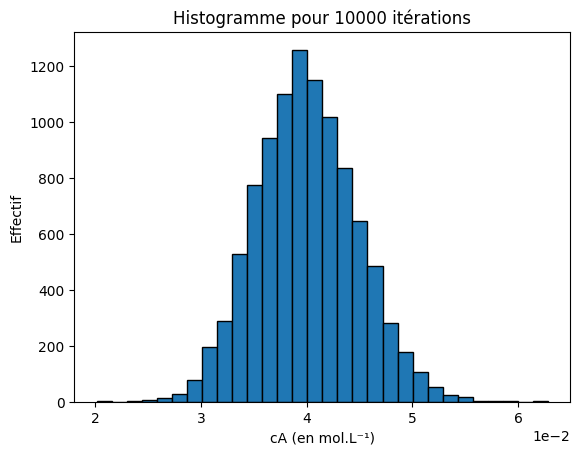

In [15]:
# Tracé de l'histogramme
plt.hist(CA, rwidth=1, bins=30, edgecolor="black")
plt.title(f"Histogramme pour {iteration:.0f} itérations")
plt.ylabel("Effectif")
plt.xlabel("cA (en mol.L\u207B\u00B9)")
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
plt.show()

<div class="alert alert-block alert-info">
    <b> Consignes </b>
    <p> Compléter et exécuter la cellule suivante (question 3)</p>
</div>

In [5]:
# Calcul de la concentration en masse
Cm = moy_CA*2363
u_Cm = u_CA*2363
# Affichage
print('Concentration C_m :', Cm,' g/L')
print('Incertitude u_Cm :', u_Cm,' g/L')

Concentration C_m : 94.54236527783705  g/L
Incertitude u_Cm : 11.201485894898958  g/L


<div class="alert alert-block alert-info">
    <b> Consignes </b>
    <p> Compléter et exécuter la cellule suivante (question 4)</p>
</div>

In [6]:
# Calcul de la masse de polyvidone iodée dans 100 mL
m = Cm * .1
u_m = u_Cm * .1
print('masse dans 100 mL : ', m, 'g')
print('Incertitude u_m :', u_m, 'g')

masse dans 100 mL :  9.454236527783705 g
Incertitude u_m : 1.120148589489896 g


<div class="alert alert-block alert-info">
    <b> Consignes </b>
    <p> Compléter et exécuter la cellule suivante (question 5)</p>
</div>

In [7]:
#Comparaison avec la valeur de référence
if m + u_m*2 > 10 and m - u_m*2 < 10 :
    print('La valeur trouvée est conforme avec la valeur de référence')
else :
    print('La valeur trouvée n\'est pas conforme avec la valeur de référence')

La valeur trouvée est conforme avec la valeur de référence
